In [2]:
import pandas as pd
import numpy as np
import matplotlib as mlb
import matplotlib.pyplot as plt


In [3]:
import seaborn as sns

In [4]:
stock_data = pd.read_csv('e:\Capstone Project\Stock Market Data Analysis\Stock_Market_Data.csv')
stock_data

,Date,Name,Open,High,Low,Close,Volume
0,02-01-2022,01.Bank,22.83,23.20,22.59,22.93,1842350.41
1,03-01-2022,01.Bank,23.03,23.29,22.74,22.90,1664989.63
2,04-01-2022,01.Bank,22.85,23.13,22.64,22.84,1354510.97
3,05-01-2022,01.Bank,22.91,23.20,22.70,22.98,1564334.81
4,06-01-2022,01.Bank,23.12,23.65,23.00,23.37,2586344.19
...,...,...,...,...,...,...,...
49153,26-06-2022,ZEALBANGLA,169.00,174.90,169.00,170.30,10480.00
49154,27-06-2022,ZEALBANGLA,174.10,176.00,166.90,167.50,13817.00
49155,28-06-2022,ZEALBANGLA,170.00,170.90,167.00,168.10,5214.00
49156,29-06-2022,ZEALBANGLA,167.10,169.00,164.90,165.10,6678.00


In [5]:
stock_data.head()

,Date,Name,Open,High,Low,Close,Volume
0,02-01-2022,01.Bank,22.83,23.20,22.59,22.93,1842350.41
1,03-01-2022,01.Bank,23.03,23.29,22.74,22.90,1664989.63
2,04-01-2022,01.Bank,22.85,23.13,22.64,22.84,1354510.97
3,05-01-2022,01.Bank,22.91,23.20,22.70,22.98,1564334.81
4,06-01-2022,01.Bank,23.12,23.65,23.00,23.37,2586344.19


*** Exploratory Data Analysis (EDA) ***

In [6]:
stock_data.shape

(49158, 7)

In [7]:
stock_data.dtypes 

Date       object
Name       object
Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

date has a series object which brings create problems, Stock market data should be in time series so convert it to time series .

In [8]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'],dayfirst=True) #default value false # dayfirst argument passing
stock_data.dtypes

Date      datetime64[ns]
Name              object
Open             float64
High             float64
Low              float64
Close            float64
Volume           float64
dtype: object

In [9]:
stock_data.head(7)

,Date,Name,Open,High,Low,Close,Volume
0,2022-01-02,01.Bank,22.83,23.20,22.59,22.93,1842350.41
1,2022-01-03,01.Bank,23.03,23.29,22.74,22.90,1664989.63
2,2022-01-04,01.Bank,22.85,23.13,22.64,22.84,1354510.97
3,2022-01-05,01.Bank,22.91,23.20,22.70,22.98,1564334.81
4,2022-01-06,01.Bank,23.12,23.65,23.00,23.37,2586344.19
5,2022-01-09,01.Bank,23.47,23.62,22.98,23.14,1813583.91
6,2022-01-10,01.Bank,23.16,23.43,22.85,23.10,1656683.94


In [10]:
stock_data['Date'].max()

Timestamp('2022-06-30 00:00:00')

*** Stock price trend for specific companies ('UNILEVERCL',  'BEXIMCO', 'RECKITTBEN',  'BATBC', 'SAIHAMCOT')

In [11]:
# CREATING A LIST OF SPECIFIC COMPANIES

specific_companies = ['UNILEVERCL',  'BEXIMCO', 'RECKITTBEN',  'BATBC', 'SAIHAMCOT']



In [12]:
# filter out your desired companies data and put it to your another dataframe

specific_data = stock_data[stock_data['Name'].isin(specific_companies)]



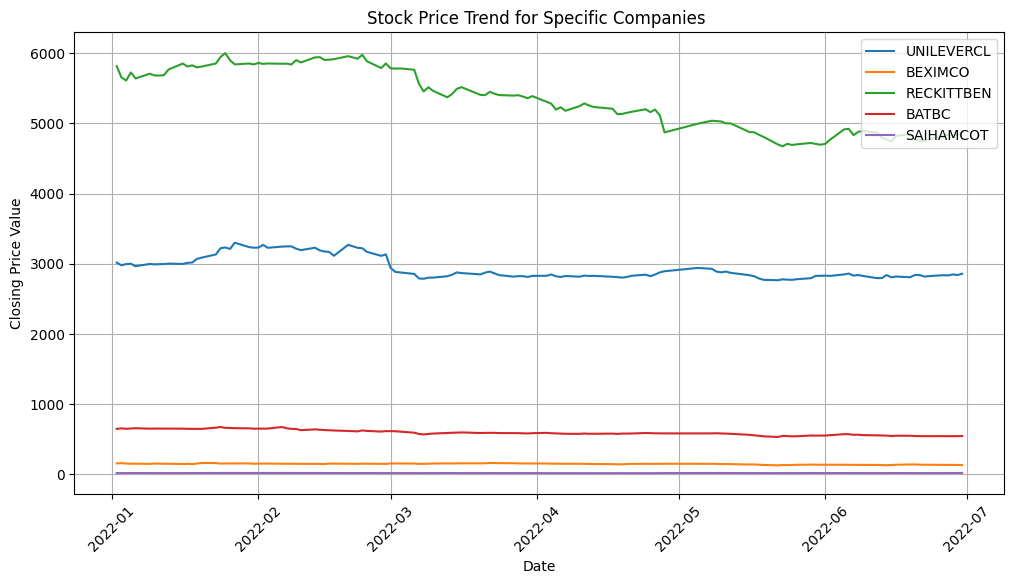

In [13]:
# creating line graph for each companies
plt.figure(figsize=(12,6))

for company in specific_companies:
    company_data = specific_data[specific_data['Name']==company]
    plt.plot(company_data['Date'],company_data['Close'],label=company)

# Adding labels and titles
plt.xlabel('Date')
plt.ylabel('Closing Price Value')
plt.title('Stock Price Trend for Specific Companies ')
plt.legend()
plt.grid()

# Improving Readability
plt.xticks(rotation=45)
plt.show()

*** Rolling Window Analysis / Moving Averages ***

C:\Users\Shatabdi\AppData\Local\Temp\ipykernel_2884\2846230263.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_data['7 day rolling averages'] = specific_data['Close'].rolling(window=7).mean()


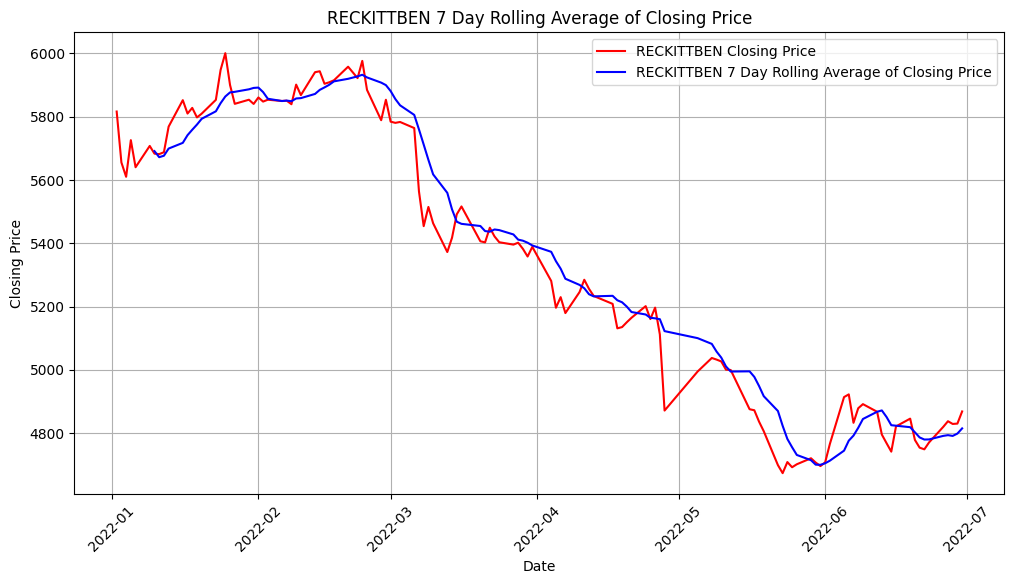

In [15]:
specific_company = 'RECKITTBEN'
specific_data = stock_data[stock_data['Name']==specific_company] # filter out
specific_data['7 day rolling averages'] = specific_data['Close'].rolling(window=7).mean()

plt.figure(figsize=(12,6))
plt.plot(specific_data['Date'],specific_data['Close'],label=f'{specific_company} Closing Price',color='red')
plt.plot(specific_data['Date'],specific_data['7 day rolling averages'],label=f'{specific_company} 7 Day Rolling Average of Closing Price',color='blue')

plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title(f'{specific_company} 7 Day Rolling Average of Closing Price')

plt.grid()
plt.legend()
plt.xticks(rotation=45)
plt.show()